##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests

from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

##Webscraping Data

In [ ]:
URLS = ["https://en.wikipedia.org/wiki/Hybrid_electric_vehicle",
       "https://en.wikipedia.org/wiki/Plug-in_electric_vehicle"]
data = []
for url in URLS:
  page = requests.get(url)
  soup = BeautifulSoup(page.content,'html.parser')
  content = soup.find_all('p')
  n = len(content)
  for x in range(n):
    data.append(str.strip(content[x].text))
print(len(data))

258


In [ ]:
data

['A hybrid electric vehicle  (HEV) is a type of hybrid vehicle that combines a conventional internal combustion engine (ICE)  system with an electric propulsion system (hybrid vehicle drivetrain). The presence of the electric powertrain is intended to achieve either better fuel economy than a conventional vehicle or better performance. There is a variety of HEV types and the degree to which each function as an electric vehicle (EV) also varies. The most common form of HEV is the hybrid electric car, although hybrid electric trucks (pickups and tractors), buses, boats and aircraft also exist.',
 "Modern HEVs make use of efficiency-improving technologies such as regenerative brakes which convert the vehicle's kinetic energy to electric energy, which is stored in a battery or supercapacitor. Some varieties of HEV use an internal combustion engine to turn an electrical generator, which either recharges the vehicle's batteries or directly powers its electric drive motors; this combination i

##WordCloud

In [ ]:
# Using wordcloud to visually represent the text data
def make_wordcloud(corpus, color = 'cyan'):
    """
    A function to create a word cloud from a corpus of words

    """
    
    words = ' '.join(corpus)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    return wordcloud

Text(0.5, 1.0, 'Electric Vehicle')

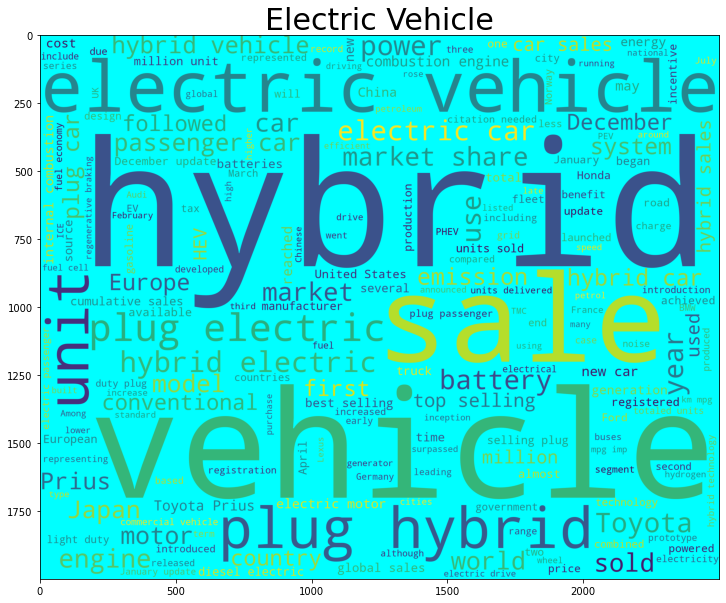

In [ ]:
ev_wordcloud = make_wordcloud(data, 'cyan')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
axes.imshow(ev_wordcloud)
axes.set_title("Electric Vehicle",fontdict={"fontsize":30})

In [ ]:
data

['A hybrid electric vehicle  (HEV) is a type of hybrid vehicle that combines a conventional internal combustion engine (ICE)  system with an electric propulsion system (hybrid vehicle drivetrain). The presence of the electric powertrain is intended to achieve either better fuel economy than a conventional vehicle or better performance. There is a variety of HEV types and the degree to which each function as an electric vehicle (EV) also varies. The most common form of HEV is the hybrid electric car, although hybrid electric trucks (pickups and tractors), buses, boats and aircraft also exist.',
 "Modern HEVs make use of efficiency-improving technologies such as regenerative brakes which convert the vehicle's kinetic energy to electric energy, which is stored in a battery or supercapacitor. Some varieties of HEV use an internal combustion engine to turn an electrical generator, which either recharges the vehicle's batteries or directly powers its electric drive motors; this combination i

In [ ]:
len(data)

258

##Text preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [ ]:
def clean(doc):
  stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
  punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
  normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
  return normalized

In [ ]:
doc_cleaned = [clean(doc).split() for doc in data]

In [ ]:
doc_cleaned

[['hybrid',
  'electric',
  'vehicle',
  'hev',
  'type',
  'hybrid',
  'vehicle',
  'combine',
  'conventional',
  'internal',
  'combustion',
  'engine',
  'ice',
  'system',
  'electric',
  'propulsion',
  'system',
  'hybrid',
  'vehicle',
  'drivetrain',
  'presence',
  'electric',
  'powertrain',
  'intended',
  'achieve',
  'either',
  'better',
  'fuel',
  'economy',
  'conventional',
  'vehicle',
  'better',
  'performance',
  'variety',
  'hev',
  'type',
  'degree',
  'function',
  'electric',
  'vehicle',
  'ev',
  'also',
  'varies',
  'common',
  'form',
  'hev',
  'hybrid',
  'electric',
  'car',
  'although',
  'hybrid',
  'electric',
  'truck',
  'pickup',
  'tractor',
  'bus',
  'boat',
  'aircraft',
  'also',
  'exist'],
 ['modern',
  'hevs',
  'make',
  'use',
  'efficiencyimproving',
  'technology',
  'regenerative',
  'brake',
  'convert',
  'vehicle',
  'kinetic',
  'energy',
  'electric',
  'energy',
  'stored',
  'battery',
  'supercapacitor',
  'variety',
  'h

##Convert the data into the document term matrix

In [ ]:
import gensim
from gensim import corpora, models

In [ ]:
# creating term dictionary of our corpus this gives indexes to every unique terms
dictionary = corpora.Dictionary(doc_cleaned) 
dictionary.filter_extremes(no_below=5)

In [ ]:
#converting corpus into doc-term matrix using above dictionary 
doc_term_matrix  = [dictionary.doc2bow(doc) for doc in doc_cleaned]

In [ ]:
doc_term_matrix

[[(0, 2),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 6),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 2)],
 [(4, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 4),
  (12, 1),
  (13, 1),
  (15, 1),
  (18, 1),
  (21, 2),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 2),
  (28, 2),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1)],
 [(9, 1),
  (28, 1),
  (32, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1)],
 [(0, 1),
  (9, 2),
  (41, 3),
  (56, 2),
  (59, 1),
  (66, 1),
  (67, 3),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  

##Running LDA model on Document-term matrix

In [ ]:
Lda = gensim.models.ldamodel.LdaModel

#training lda model on document term matrix
num_topics = 5
lda_model = Lda(doc_term_matrix,num_topics=num_topics,id2word= dictionary,passes=5,alpha=[0.01]*num_topics,eta=[0.01]*len(dictionary.keys()))

In [ ]:
for topic,words in lda_model.show_topics():
  print(str(topic)+' : '+words)
  print()

0 : 0.044*"plugin" + 0.039*"electric" + 0.025*"market" + 0.021*"sale" + 0.018*"toyota" + 0.016*"share" + 0.014*"model" + 0.014*"unit" + 0.013*"allelectric" + 0.011*"december"

1 : 0.036*"electric" + 0.029*"battery" + 0.028*"motor" + 0.024*"engine" + 0.017*"power" + 0.016*"honda" + 0.016*"use" + 0.014*"system" + 0.013*"needed" + 0.013*"also"

2 : 0.019*"per" + 0.017*"gallon" + 0.017*"tax" + 0.017*"year" + 0.016*"cost" + 0.016*"km" + 0.015*"u" + 0.015*"city" + 0.015*"plugin" + 0.014*"incentive"

3 : 0.071*"electric" + 0.041*"plugin" + 0.027*"engine" + 0.025*"motor" + 0.021*"battery" + 0.016*"fuel" + 0.014*"energy" + 0.013*"stock" + 0.012*"power" + 0.012*"also"

4 : 0.067*"sale" + 0.045*"unit" + 0.035*"million" + 0.028*"toyota" + 0.027*"prius" + 0.025*"sold" + 0.021*"market" + 0.021*"plugin" + 0.016*"global" + 0.015*"december"



In [ ]:
lda_model[doc_term_matrix[0]]

[(3, 0.99878967)]

####Document 1 is 99% about topic 3

##Visualizing LDA Model using pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [ ]:
viz = gensimvis.prepare(topic_model=lda_model,corpus=doc_term_matrix,dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(viz)

In [ ]:
PlugInEv = ['plugin','battery','passenger','unit','allelectric']

In [ ]:
HybridEv = ['hybrid','electricity','emission','sale','ev']

In [ ]:
df = pd.DataFrame(data,columns=['Article'])
df['Topic'] = np.nan
df

,Article,Topic
0,A hybrid electric vehicle (HEV) is a type of ...,NaN
1,Modern HEVs make use of efficiency-improving t...,NaN
2,Ferdinand Porsche developed the Lohner-Porsche...,NaN
3,"As of April 2020[update], over 17 million hybr...",NaN
4,Global sales are led by the Toyota Motor Compa...,NaN
...,...,...
253,The following table presents global sales of t...,NaN
254,The Mitsubishi Outlander P-HEV is the world's ...,NaN
255,Ranking second is the Toyota Prius Plug-in Hyb...,NaN
256,Combined global sales of the Chevrolet Volt an...,NaN


In [ ]:
df1 = df.copy()

In [ ]:
for i in df.index:
  a1 = any(x in df.loc[i, 'Article'] for x in PlugInEv)
  a2 = any(x in df.loc[i, 'Article'] for x in HybridEv)
  if(a1==True): df.loc[i, 'Topic'] = 'PlugInEv'
  elif(a2==True): df.loc[i, 'Topic'] = 'HybridEv'
  else: df.loc[i,'Topic'] = 'Electric Vehicle'

In [ ]:
df.head(10)

,Article,Topic
0,A hybrid electric vehicle (HEV) is a type of ...,HybridEv
1,Modern HEVs make use of efficiency-improving t...,PlugInEv
2,Ferdinand Porsche developed the Lohner-Porsche...,HybridEv
3,"As of April 2020[update], over 17 million hybr...",PlugInEv
4,Global sales are led by the Toyota Motor Compa...,PlugInEv
5,Hybrid electric vehicles can be classified acc...,Electric Vehicle
6,In each of the hybrids above it is common to u...,HybridEv
7,"A plug-in hybrid electric vehicle (PHEV), also...",HybridEv
8,Chinese battery manufacturer and automaker BYD...,PlugInEv
9,"As of December 2016[update], the Volt/Ampera f...",PlugInEv


In [ ]:
import re
for i in df.index:
    df.loc[i, "Article"] = re.sub("[\[].*?[\]]", "", str(df.loc[i, "Article"]),)

In [ ]:
df.Article.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

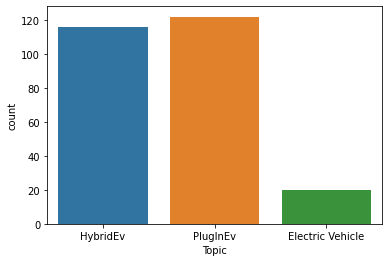

In [ ]:
sns.countplot(df['Topic'])

In [ ]:
df.to_csv("Ev.csv")